Accuracy: 0.9220
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       0.93      0.89      0.91        62
           2       0.95      1.00      0.97        56
           3       1.00      1.00      1.00        51
           4       0.98      1.00      0.99        54
           5       0.95      1.00      0.97        55
           6       0.89      1.00      0.94        50
           7       0.76      0.53      0.63        60
           8       0.96      0.93      0.95        56
           9       1.00      1.00      1.00        54
          10       0.64      0.89      0.74        63
          11       0.94      0.76      0.84        63
          12       0.91      1.00      0.95        42
          13       1.00      1.00      1.00        48
          14       0.96      1.00      0.98        64
          15       0.97      0.92      0.95        66
          16       0.82      0.67      0

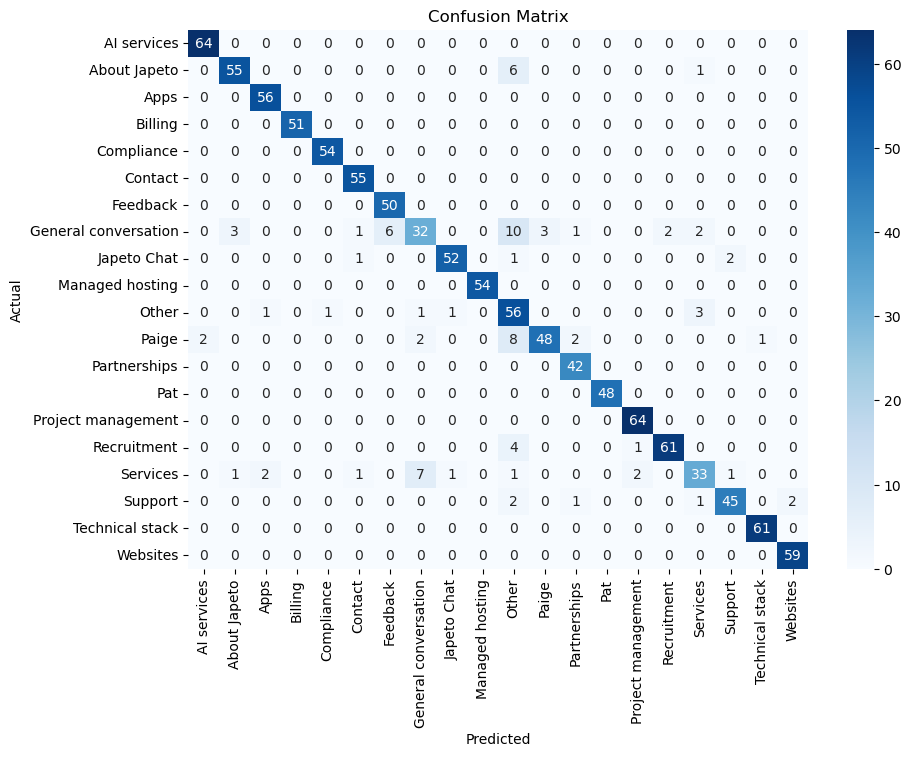

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = "chatbot_dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Result 1')

# Encode text labels into integers
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['categories'])

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english", ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df["user_message"])

# Balance the dataset using random oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_tfidf, df['category_encoded'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
import time

# Measure the time taken to predict all data
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

# Display the execution time
print(f"Classification time for {len(X_test.toarray())} messages: {end_time - start_time:.4f} seconds")
print(f"Average time per message: {(end_time - start_time) / len(X_test.toarray()):.6f} seconds")


Classification time for 1128 messages: 0.0015 seconds
Average time per message: 0.000001 seconds


In [19]:
def classify_text(text):
    # Преобразуем входной текст в TF-IDF формат
    text_vectorized = vectorizer.transform([text])
    
    # Получаем предсказанную категорию (в числовом виде)
    predicted_category_encoded = model.predict(text_vectorized)[0]
    
    # Декодируем категорию обратно в человекочитаемый формат
    predicted_category = label_encoder.inverse_transform([predicted_category_encoded])[0]
    
    return predicted_category

# Пример использования
user_input = "what can Pat do exactly"
predicted = classify_text(user_input)
print(f"Predicted category: {predicted}")


Predicted category: Pat


In [7]:
df.head()

,session_id,message_time,user_message,chatbot_response,response_source,categories,intent_name,category_encoded
0,526919,2025-02-06 06:31:46,timezone test,"I'm happy to chat with you, but I'm a sales an...",Generative AI,Other,AI generated,10
1,526920,2025-02-06 06:32:00,how r u,I'm an AI Assistant... I don't know how I am. ...,NLU,General conversation,How are you,7
2,526920,2025-02-06 06:32:16,im awful,I'm sorry to hear that. \n\nAre you having an ...,NLU,Other,Answers question about self negatively,10
3,526920,2025-02-06 06:32:17,nope,I'm happy to assist you with any questions you...,Generative AI,General conversation,AI generated,7
4,526921,2025-02-06 06:32:32,hello paige,Hi! Thanks for chatting. I'm an AI Assistant f...,NLU,Services,Hello,16
